# ML741
## Assignment 1

In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Read the CSV file
df = pd.read_excel('beans.xlsx')

In [12]:
df.isna().sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class              17
Sort_order          0
dtype: int64

### Label encoding

In [4]:
# First, observe the class distributions
class_counts = df.value_counts(['Class'])
class_proportions = df.value_counts(['Class'], normalize=True)
data = {'Count': class_counts, 'Proportion': class_proportions}
class_dist = pd.DataFrame(data)
class_dist

,Count,Proportion
Class,,
DERMASON,3535,0.260712
SIRA,2632,0.194115
SEKER,2017,0.148757
HOROZ,1917,0.141382
CALI,1623,0.119699
BARBUNYA,1317,0.097131
BOMBAY,518,0.038203


In [5]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
df['Colour'] = le1.fit_transform(df['Colour'])
class_mapping1 = dict(zip(le1.classes_, le1.transform(le1.classes_)))
for original, encoded in class_mapping1.items():
    print(f"{original}: {encoded}")

le2 = LabelEncoder()
df['Class'] = le2.fit_transform(df['Class'])
class_mapping2 = dict(zip(le2.classes_, le2.transform(le2.classes_)))
for original, encoded in class_mapping2.items():
    print(f"{original}: {encoded}")

black: 0
brown: 1
green: 2
white: 3


In [8]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness',
       'EquivDiameter', 'Colour', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6', 'Class', 'Sort_order'],
      dtype='object')

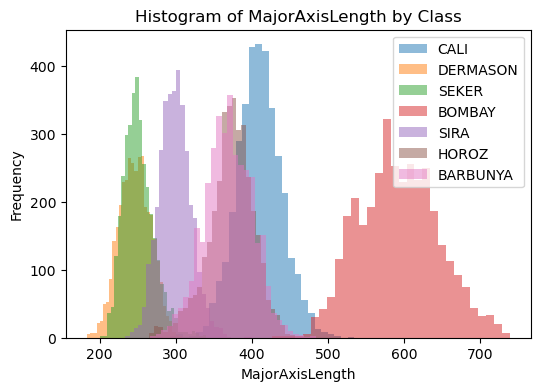

In [9]:
def plot_histogram_with_classes(data, variable, class_column, bins=30):
    plt.figure(figsize=(6, 4))
    
    unique_classes = data[class_column].unique()
    for class_value in unique_classes:
        class_data = data[data[class_column] == class_value]
        plt.hist(class_data[variable], bins=bins, alpha=0.5, label=f'{class_value}')
    
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {variable} by Class')
    plt.legend()
    plt.show()

# Usage

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X=df.drop(columns=['Class'])
y=df['Class']
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled
plot_histogram_with_classes(df_resampled, 'MajorAxisLength', 'Class')

## Histograms

In [ ]:
# Assuming df is your DataFrame
fig, ax = plt.subplots(figsize=(6,4))

# Plot the histogram
sns.histplot(data=df, x='Extent', kde=False, ax=ax, color='skyblue', edgecolor='black')

# Calculate mean and median
mean_value = df['Extent'].mean()
median_value = df['Extent'].median()

# Add vertical lines for mean and median
ax.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
ax.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Set title and labels
# ax.set_title('Distribution of ShapeFactor6', fontsize=14, fontweight='bold')
ax.set_xlabel('Extent')
ax.set_ylabel('Frequency')

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=11, loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()

## PCA

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

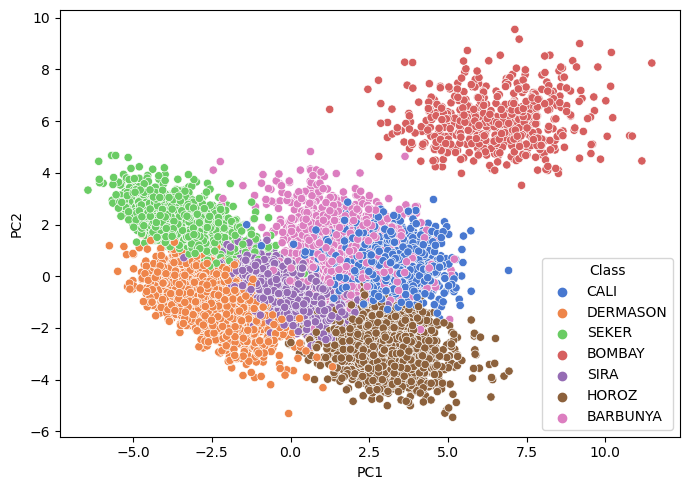

In [57]:
X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2).fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y.reset_index(drop=True)


fig, ax = plt.subplots(figsize=(7, 5))

# First plot
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='muted')
ax1.set_title('PCA plot of dry beans data')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()